## Week 1: Exploratory data analysis

In [238]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data

steps = pd.read_csv("steps.csv", sep=";")
survey = pd.read_csv("survey.csv")

First, I showed both datasets to see what variables there are and to determine which variable to use for the merging

In [239]:
steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [241]:
df = pd.merge(survey, steps, on = 'id')
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After the merge, I added a variable mean which contains the range between 20-06-2013 and 13-5-2014

In [242]:
df['mean'] = df.loc[:, '20-6-2013':'13-5-2014'].mean(axis = 1) #creating a new column with the mean of steps per participant
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


Now I am going to cut the values off at 25000 for the variable mean steps per participant

In [243]:
def cut_off(x): #It's very unlikely that somebody has a average of steps above 25.000, so with the 'def' ever mean above 25.000 will be replaced with 25.000
    if x > 25000:
        return float('25000')
    else:
        return x
df['mean'] = df['mean'].apply(cut_off)
def below0(x):
    if x < 0:
        return float('NaN')
    else:
        return x
df['mean'] = df['mean'].apply(below0)

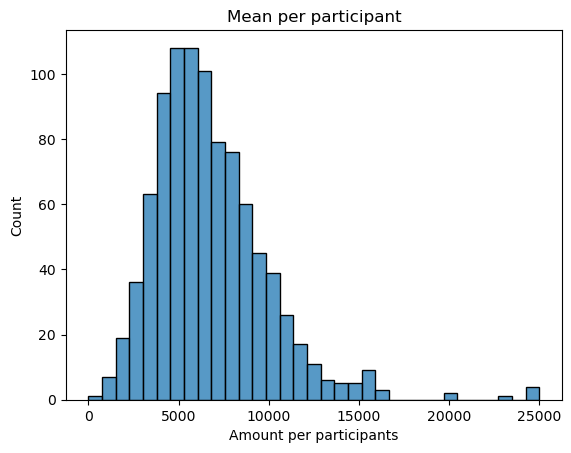

In [244]:
steps = sns.histplot(df['mean'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Mean per participant')
plt.xlabel('Amount per participants')
plt.show()

/Users/tessaoren/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


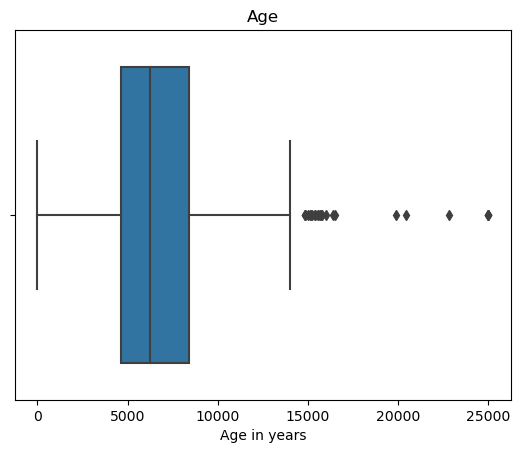

In [245]:
sns.boxplot(df['mean'])
plt.title('Age')
plt.xlabel('Age in years')
plt.show()

In [246]:
df_merged = df.loc[:, '20-6-2013':'13-5-2014']
df_merged.describe()

,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,24.000000,243.000000,278.000000,296.000000,354.000000,353.000000,328.000000,380.000000,419.000000,302.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,8690.810198,8362.570122,8261.913158,9231.391408,7202.258278,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,4843.885824,5762.374515,4325.239676,5282.031304,5251.930917,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,164.000000,67.000000,25.000000,43.000000,11.000000,154.000000,7.000000,4.000000,9.000000,6.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,5212.000000,4496.000000,5261.250000,5679.000000,2864.000000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,8299.000000,7638.000000,8147.000000,8844.000000,6281.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,11386.000000,11910.000000,11000.000000,12140.500000,10881.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,23902.000000,31254.000000,23836.000000,43238.000000,27747.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.

In [247]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


## Week 2

In [248]:
df.loc[:,["age","hh_size","education","height","weight","mean"]]

,age,hh_size,education,height,weight,mean
0,25-34,4,4,178.0,98.0,10205.521212
1,35-44,1,3,180.0,77.0,5687.423313
2,25-34,2,2,180.0,83.0,8301.729730
3,<25,1,1,178.0,80.0,3633.200000
4,25-34,3,4,167.0,61.0,5312.129630
...,...,...,...,...,...,...
924,45-54,3,4,165.0,59.0,6282.131868
925,<25,3,5,192.0,90.0,4799.880000
926,35-44,2,2,181.0,71.0,10030.326829
927,55-64,1,1,172.0,65.0,15679.679012


In [249]:
df['gender'].replace(['Male','Female'], [0,1], inplace=True) #the axis=1 means: add it to the columns (axis=0 is rows)
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,0,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,0,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,0,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,0,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,1,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [250]:
df.loc[:,["gender","age","hh_size","education","height","weight","mean"]]

,gender,age,hh_size,education,height,weight,mean
0,0,25-34,4,4,178.0,98.0,10205.521212
1,0,35-44,1,3,180.0,77.0,5687.423313
2,0,25-34,2,2,180.0,83.0,8301.729730
3,0,<25,1,1,178.0,80.0,3633.200000
4,1,25-34,3,4,167.0,61.0,5312.129630
...,...,...,...,...,...,...,...
924,1,45-54,3,4,165.0,59.0,6282.131868
925,0,<25,3,5,192.0,90.0,4799.880000
926,0,35-44,2,2,181.0,71.0,10030.326829
927,1,55-64,1,1,172.0,65.0,15679.679012


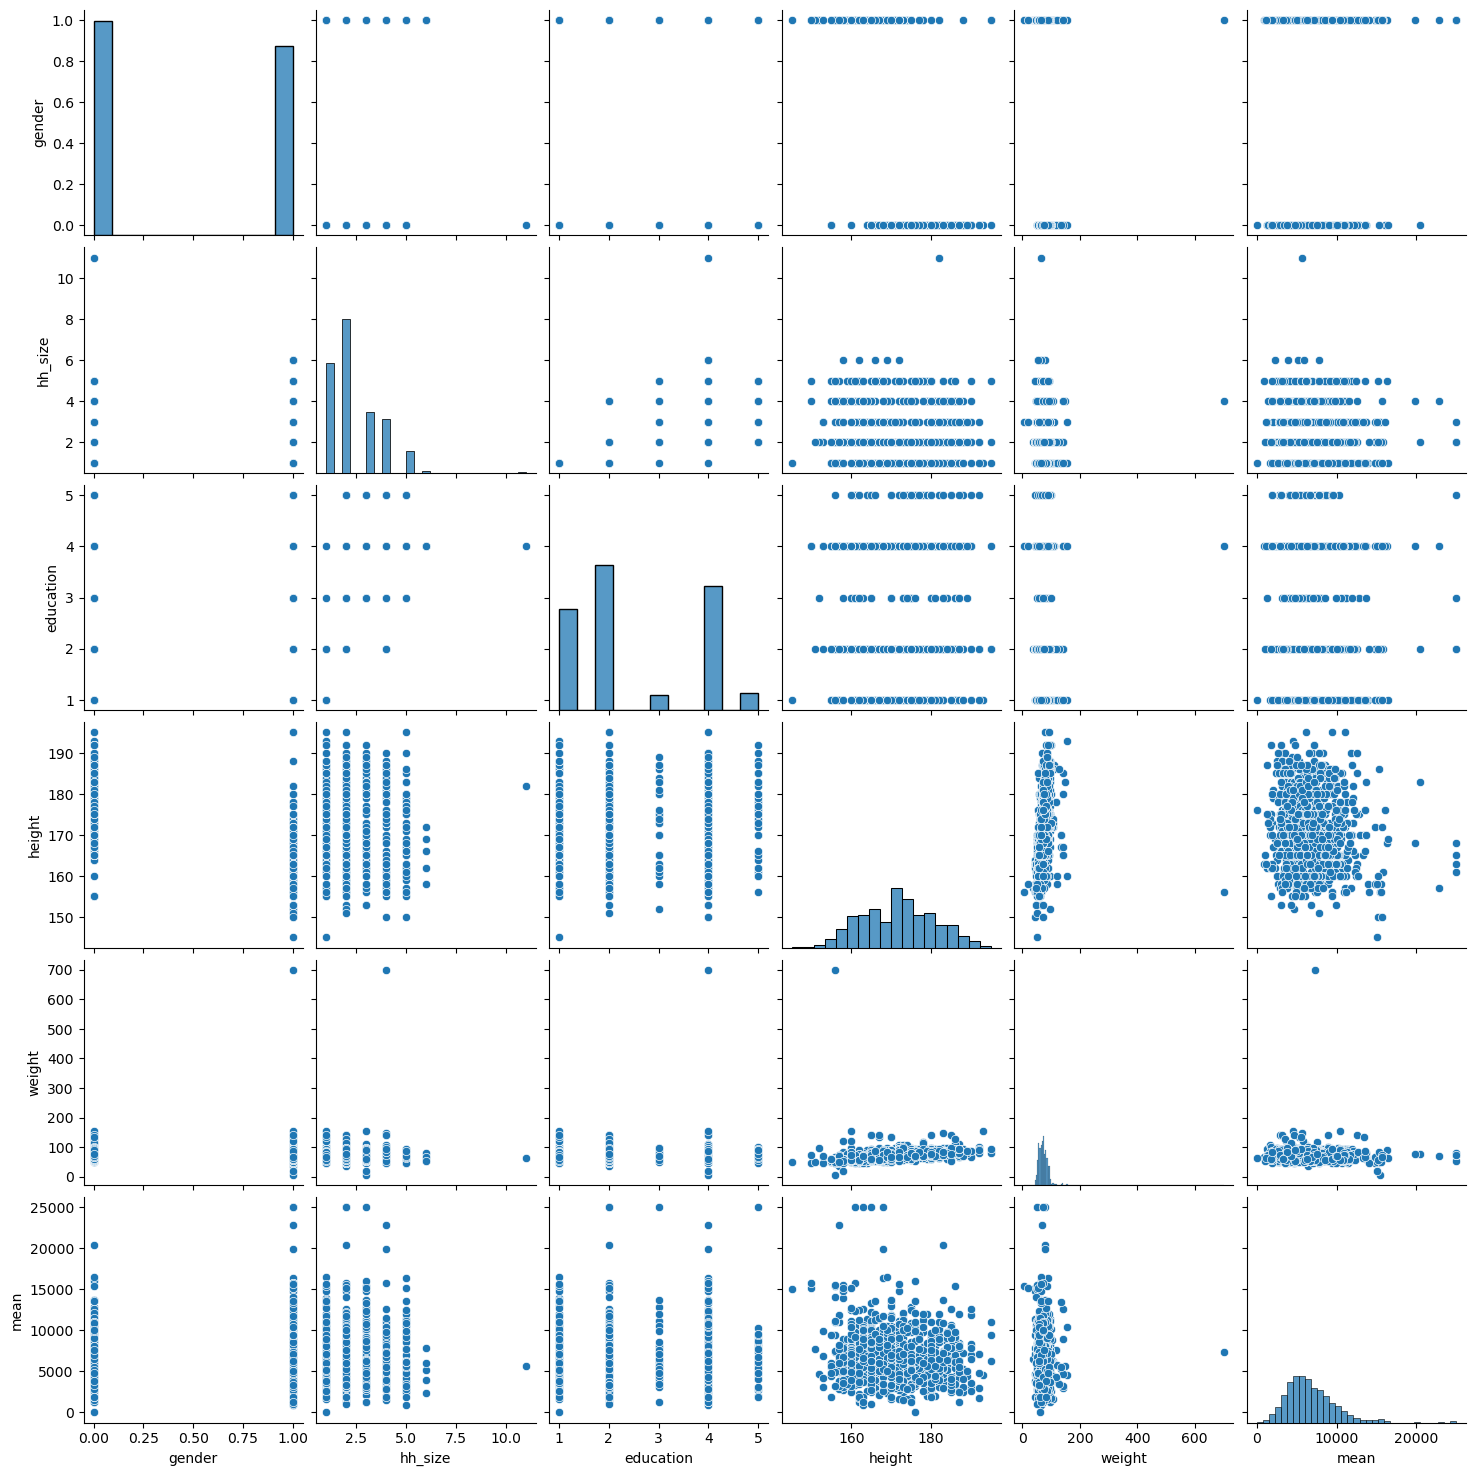

In [251]:
df_subset=df[["gender","age","hh_size","education","height","weight","mean"]]
sns.pairplot(df_subset)
plt.show() #using Matplotlib to show the plot




In [252]:
df_subset.corr()

,gender,hh_size,education,height,weight,mean
gender,1.000000,0.026577,0.012117,-0.713257,-0.227547,0.087965
hh_size,0.026577,1.000000,0.825585,-0.059704,0.036468,0.036115
education,0.012117,0.825585,1.000000,-0.046343,0.029968,0.031364
height,-0.713257,-0.059704,-0.046343,1.000000,0.265138,-0.100112
weight,-0.227547,0.036468,0.029968,0.265138,1.000000,-0.045508
mean,0.087965,0.036115,0.031364,-0.100112,-0.045508,1.000000


In [253]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=["age","hh_size","education","height","weight","mean"], how="all", inplace=True)
df.head()




,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,0,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,0,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,0,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,0,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,1,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [254]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[['height']] 
y = df['weight']
lm = LinearRegression() #this creates a new LR model
lm = lm.fit(x, y) #this "fits" the model

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').